## Bears are lovely, but are all of them?
-by Suraj Negi

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
%matplotlib inline
from PIL import Image
import pandas as pd

In [5]:
df=pd.read_csv('bear_Oh_bear.csv')
df.drop(['Bear Index'],1,inplace=True)
headers = df.dtypes.index
header=headers.tolist()

y=np.array(df['Fur Growth'][::5])
x=np.array(df['Temperature Change'][::5])

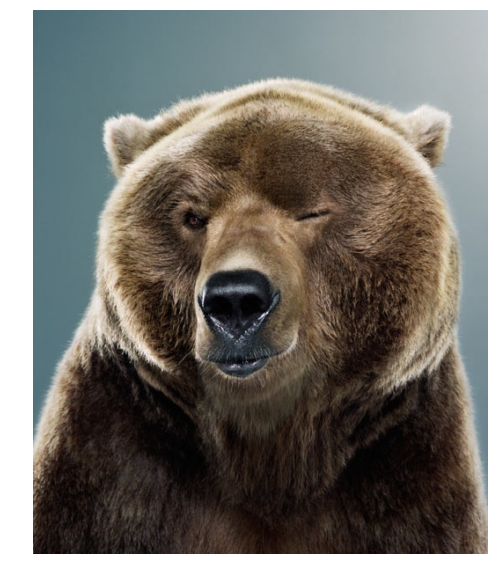

In [6]:
plt.figure(figsize=(15,10))
bear = np.array(Image.open('bear_Oh_bear.jpg'))
plt.imshow(bear,interpolation="bilinear")
plt.axis("off")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

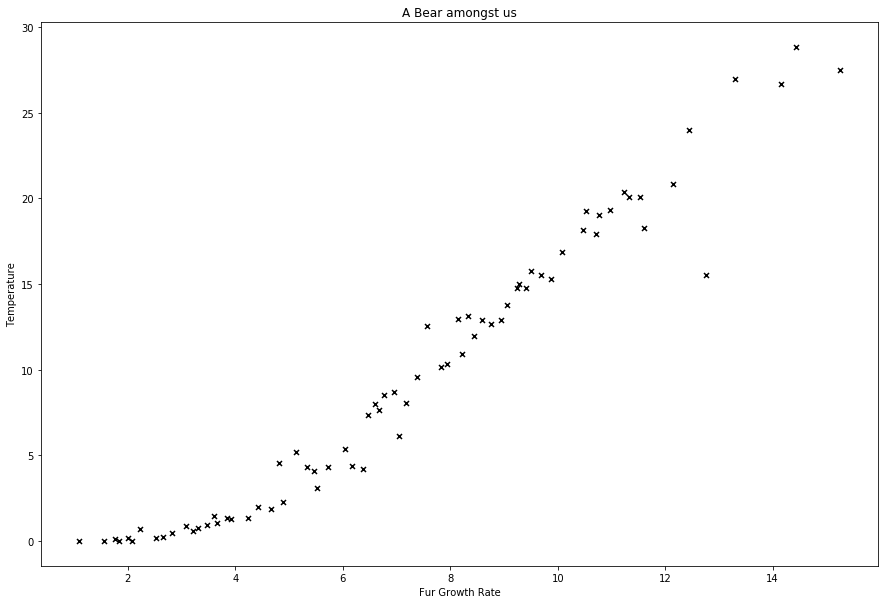

In [7]:
plt.figure(figsize=(15,10))
plt.scatter(x,y,s=25,color='k',marker='x')
plt.title("A Bear amongst us")
plt.xlabel("Fur Growth Rate")
plt.ylabel("Temperature")
plt.show

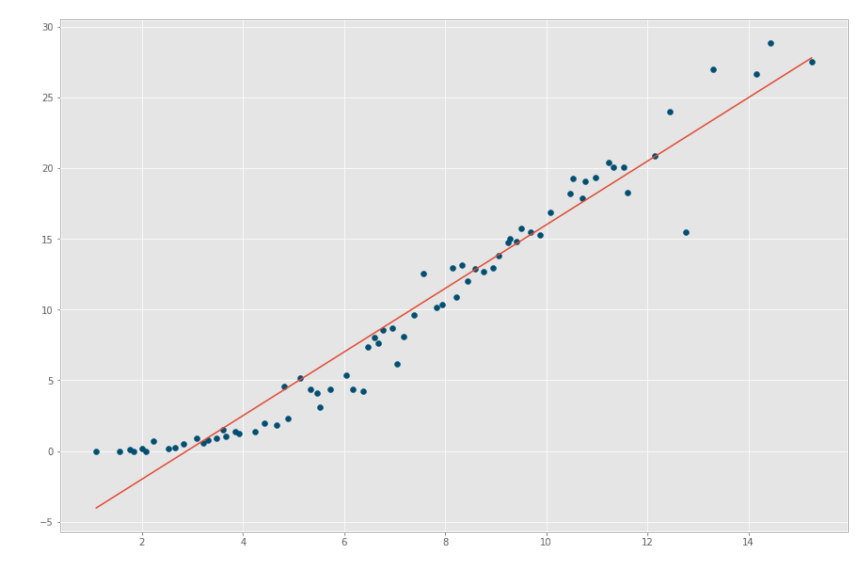

In [8]:
plt.figure(figsize=(15,10))
LinReg = np.array(Image.open('linearRegression.png'))
plt.imshow(LinReg,interpolation="bilinear")
plt.axis("off")
plt.show()

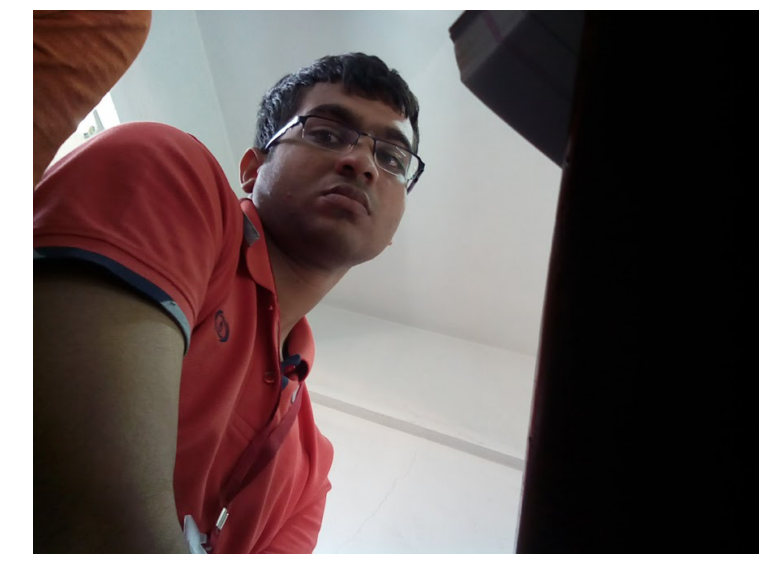

In [9]:
plt.figure(figsize=(15,10))
bear = np.array(Image.open('sadAllan.jpg'))
plt.imshow(bear,interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
def normalize(D,range):
    new_d=[]
    new_min=range[0]
    old_min=min(D)
    old_max=max(D)
    new_max=range[1]
    for d in D:
        k=new_min+((d-old_min)*(new_max-new_min))/float(old_max-old_min)
        new_d.append(k)
    return new_d

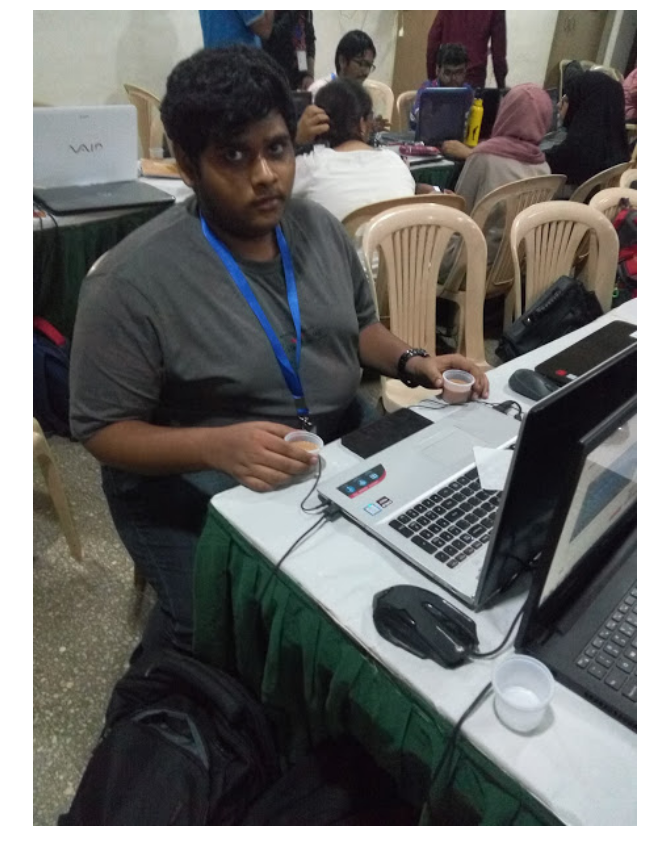

In [11]:
plt.figure(figsize=(15,15))
weight = np.array(Image.open('weight.jpg'))
plt.imshow(weight,interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
def weight(x_data,x_predict):
    n=len(x_data)
    weight=np.eye(n)
    D=[]
    for i in range(n):
        d=x_data[i]-x_predict
        D.append(d)
    normalized_D=normalize(D,[0,1])
    
    for i in range(n):
        weight[i][i]=np.exp(-0.5*(D[i]**2)*normalized_D[i])
        
    return weight

In [13]:
weight(x,2)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.96764104e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.98652579e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.45770938e-30, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.17243190e-32, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.77451088e-39]])

In [14]:
def beta(x_data,y_data,x_predict):
    X=np.matrix([[1,x_data[i]] for i in range(len(x_data))])
    Y=np.matrix(y_data).T
    W=weight(x_data,x_predict)
    
    XT_W=np.dot(X.T,W)
    
    beta=np.dot(XT_W,X).I
    beta=np.dot(beta,XT_W)
    beta=np.dot(beta,Y)
    
    return beta

In [15]:
beta(x,y,2)

matrix([[-1.78289335],
        [ 0.90615253]])

In [16]:
def predict(x_data,y_data,x_predict):
    x_mat=np.mat([1,x_predict])
    B=beta(x_data,y_data,x_predict)
    predict=np.dot(x_mat,B)
    
    return predict

In [17]:
to_predict=[10,12,4,14]
predicted=[]
for value in to_predict:
    predicted.append(np.array(predict(x,y,value)))

new_predicted=[]
for value in predicted:
    new_predicted.append(value[0])
    
print(new_predicted)

[array([16.30547398]), array([20.66599377]), array([2.27225525]), array([25.86909918])]


<function matplotlib.pyplot.show(*args, **kw)>

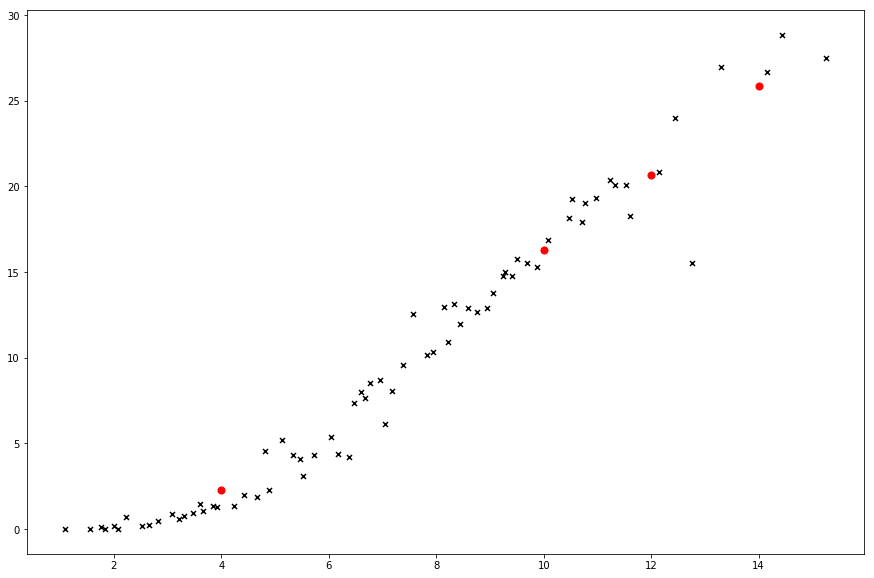

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(x,y,s=25,color='k',marker='x')
plt.scatter(to_predict,new_predicted,s=50,color='r')
plt.show

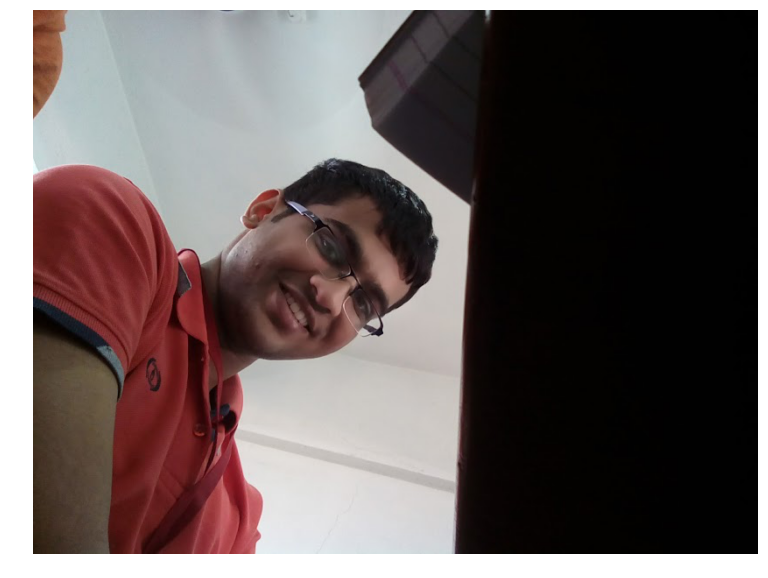

In [19]:
plt.figure(figsize=(15,10))
bear = np.array(Image.open('happyAllan.jpg'))
plt.imshow(bear,interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
def predict_us(list_of_values):
    to_predict=list_of_values
    predicted=[]
    for value in to_predict:
        predicted.append(np.array(predict(x,y,value)))

    new_predicted=[]
    for value in predicted:
        new_predicted.append(value[0])

    return new_predicted

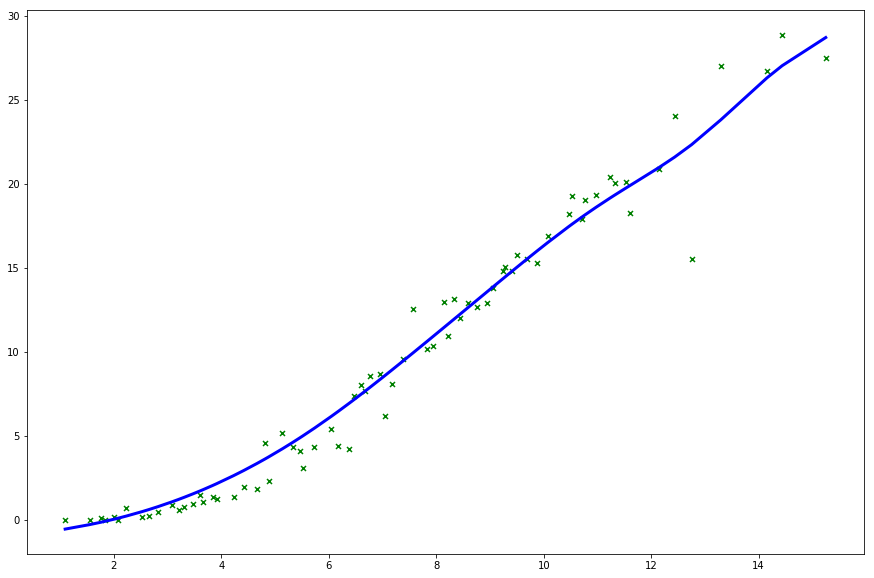

In [23]:
plt.figure(figsize=(15,10))
new_y=predict_us(x)
plt.scatter(x,y,s=25,color='g',marker='x')
plt.plot(x,new_y,color='b',linewidth=3)

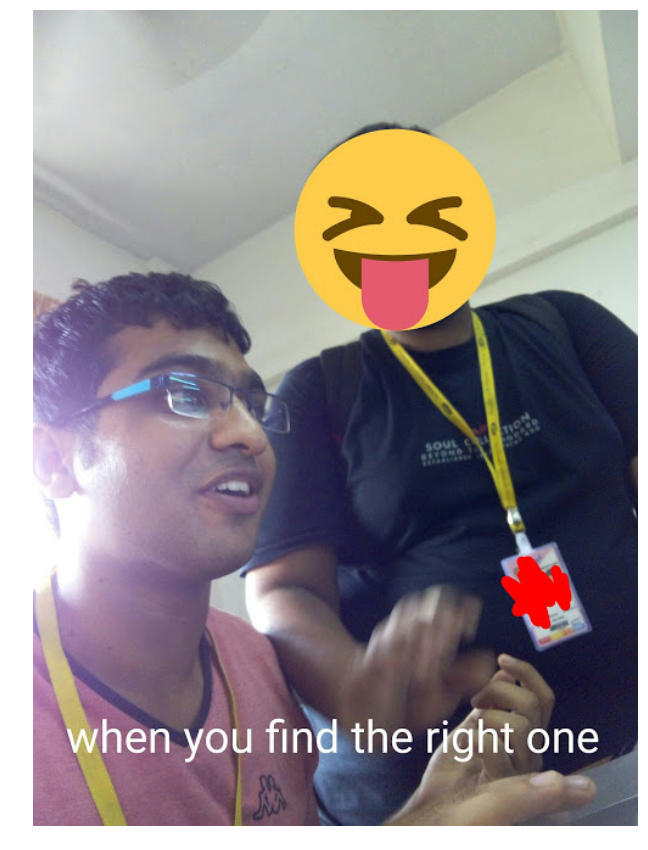

In [24]:
plt.figure(figsize=(15,15))
bear = np.array(Image.open('the_right_one.jpg'))
plt.imshow(bear,interpolation="bilinear")
plt.axis("off")
plt.show()

# Bear Friends Forever!!!